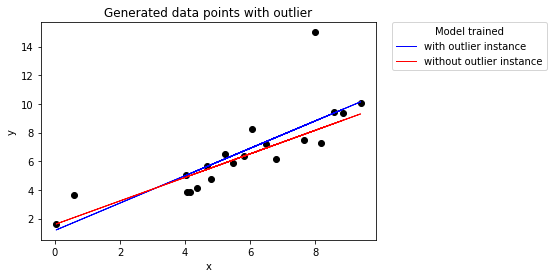

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

def generate_data(num_points, noise_factor):
    data = []
    for _ in range(num_points):
        x = random.uniform(0, 10)  # Zufällige x-Werte zwischen 0 und 10 generieren
        noise = random.uniform(-1, 1) * noise_factor  # Rauschen hinzufügen
        y = 0.8 * x + 2 + noise  # y-Wert entsprechend der Geraden y = 0.8*x + 2 mit Rauschen generieren
        data.append((x, y))
    return data

# Beispielaufruf mit 19 Datenpunkten und Rauschfaktor 1.5
data_points = generate_data(19, 1.5)
data_points_outlier = data_points.copy()

data_points_outlier.append((8,15))

x_values = np.reshape([point[0] for point in data_points],(-1,1))
y_values = np.reshape([point[1] for point in data_points],(-1,1))

x_values_outlier = np.reshape([point[0] for point in data_points_outlier],(-1,1))
y_values_outlier = np.reshape([point[1] for point in data_points_outlier],(-1,1))


regr = linear_model.LinearRegression()
regr.fit(x_values, y_values)
pred = regr.predict(x_values)

regr_outlier = linear_model.LinearRegression()
regr_outlier.fit(x_values_outlier, y_values_outlier)
pred_outlier = regr_outlier.predict(x_values_outlier)

plt.plot(x_values_outlier, pred_outlier, color="blue", linewidth=1, label="with outlier instance")
plt.plot(x_values, pred, color="red", linewidth=1, label="without outlier instance")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title="Model trained")
plt.scatter(x_values_outlier, y_values_outlier, color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated data points with outlier')
plt.show()

In [2]:
def calc_DFBETA(X, y):
    coef = []
    for elem in X:
        indx = np.where(X == elem)[0]
        X_withoutElem = np.delete(X, indx).reshape((-1,1))
        y_withoutElem = np.delete(y, indx).reshape((-1,1))
        regr = linear_model.LinearRegression()
        regr.fit(X_withoutElem, y_withoutElem)
        coef.append(regr.coef_[0][0])
    return coef
        
coef_without_outlier = calc_DFBETA(x_values, y_values)
coef_with_outlier = calc_DFBETA(x_values_outlier, y_values_outlier)

coef1 = list(map(abs, coef_without_outlier - regr.coef_))[0]
coef2 = list(map(abs, coef_with_outlier - regr_outlier.coef_))[0]

print("Max Coef Without Outlier:")
print(coef1.max())
print("Average Coef Without Outlier:")
print(np.average(coef1))
print("Max Coef With Outlier:")
print(coef2.max())
print("Average Coef With Outlier:")
print(np.average(coef2))

Max Coef Without Outlier:
0.09219234118474773
Average Coef Without Outlier:
0.014671717753933418
Max Coef With Outlier:
0.1342464162074959
Average Coef With Outlier:
0.021178442043802554
